In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import cv2
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
X_ = joblib.load("converted_img.pkl")
y_ = joblib.load("label.pkl")

In [30]:
X = joblib.load("CV2_float32.pkl")
y = joblib.load("label.pkl")

In [43]:
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1)
encoder.fit(y)
y = encoder.transform(y)
y_ = encoder.transform(y.reshape(-1, 1))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [45]:
es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=15, mode="max")

In [12]:
Input = keras.layers.Input(shape=X[0].shape)

x = keras.layers.Conv2D(16, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)


x = keras.layers.GlobalAveragePooling2D()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 6s 16ms/step - loss: 1.1408 - accuracy: 0.4930 - val_loss: 5.2722 - val_accuracy: 0.1835
Epoch 2/100
171/171 [==============================] - 2s 12ms/step - loss: 0.9320 - accuracy: 0.5852 - val_loss: 6.1588 - val_accuracy: 0.1835
Epoch 3/100
171/171 [==============================] - 2s 13ms/step - loss: 0.8329 - accuracy: 0.6238 - val_loss: 4.1838 - val_accuracy: 0.2126
Epoch 4/100
171/171 [==============================] - 2s 13ms/step - loss: 0.7816 - accuracy: 0.6593 - val_loss: 2.5229 - val_accuracy: 0.3159
Epoch 5/100
171/171 [==============================] - 2s 12ms/step - loss: 0.7357 - accuracy: 0.6766 - val_loss: 1.7602 - val_accuracy: 0.4258
Epoch 6/100
171/171 [==============================] - 2s 12ms/step - loss: 0.7139 - accuracy: 0.6872 - val_loss: 1.7669 - val_accuracy: 0.4374
Epoch 7/100
171/171 [==============================] - 2s 13ms/step - loss: 0.6842 - accuracy: 0.7064 - val_loss: 1.4533 - val_accuracy:

In [37]:
X = joblib.load("CV2_float32.pkl")
y = joblib.load("label.pkl")

In [38]:
history_list=[]

In [46]:
Input = keras.layers.Input(shape=X[0].shape)

x = keras.layers.Conv2D(16, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)


x = keras.layers.GlobalAveragePooling2D()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history_list.append(model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100))
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 4s 15ms/step - loss: 1.2041 - accuracy: 0.5139 - val_loss: 7.2212 - val_accuracy: 0.1835
Epoch 2/100
171/171 [==============================] - 2s 13ms/step - loss: 0.8970 - accuracy: 0.5927 - val_loss: 7.2431 - val_accuracy: 0.1835
Epoch 3/100
171/171 [==============================] - 2s 13ms/step - loss: 0.8314 - accuracy: 0.6178 - val_loss: 4.9461 - val_accuracy: 0.1995
Epoch 4/100
171/171 [==============================] - 2s 13ms/step - loss: 0.7824 - accuracy: 0.6381 - val_loss: 2.2814 - val_accuracy: 0.3231
Epoch 5/100
171/171 [==============================] - 2s 12ms/step - loss: 0.7558 - accuracy: 0.6575 - val_loss: 1.4306 - val_accuracy: 0.4681
Epoch 6/100
171/171 [==============================] - 2s 13ms/step - loss: 0.7204 - accuracy: 0.6769 - val_loss: 1.4629 - val_accuracy: 0.4786
Epoch 7/100
171/171 [==============================] - 2s 14ms/step - loss: 0.6929 - accuracy: 0.6875 - val_loss: 1.4843 - val_accuracy:

171/171 [==============================] - 2s 12ms/step - loss: 0.1272 - accuracy: 0.9540 - val_loss: 0.3017 - val_accuracy: 0.9027
Epoch 58/100
171/171 [==============================] - 2s 12ms/step - loss: 0.1367 - accuracy: 0.9495 - val_loss: 0.2198 - val_accuracy: 0.9253
Epoch 59/100
171/171 [==============================] - 2s 13ms/step - loss: 0.1225 - accuracy: 0.9555 - val_loss: 0.2962 - val_accuracy: 0.9000
Epoch 60/100
171/171 [==============================] - 2s 13ms/step - loss: 0.1152 - accuracy: 0.9564 - val_loss: 0.2959 - val_accuracy: 0.9049
Epoch 61/100
171/171 [==============================] - 2s 12ms/step - loss: 0.1244 - accuracy: 0.9538 - val_loss: 0.3345 - val_accuracy: 0.8901
Epoch 62/100
171/171 [==============================] - 2s 12ms/step - loss: 0.1170 - accuracy: 0.9568 - val_loss: 0.2138 - val_accuracy: 0.9242
Epoch 63/100
171/171 [==============================] - 2s 12ms/step - loss: 0.1077 - accuracy: 0.9592 - val_loss: 0.2616 - val_accuracy: 0.913

In [47]:
Input = keras.layers.Input(shape=X[0].shape)

x = keras.layers.Conv2D(16, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)


x = keras.layers.GlobalAveragePooling2D()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history_list.append(model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100))
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 4s 17ms/step - loss: 1.1033 - accuracy: 0.5108 - val_loss: 6.3878 - val_accuracy: 0.1835
Epoch 2/100
171/171 [==============================] - 3s 15ms/step - loss: 0.9083 - accuracy: 0.5908 - val_loss: 6.6711 - val_accuracy: 0.1835
Epoch 3/100
171/171 [==============================] - 3s 15ms/step - loss: 0.8406 - accuracy: 0.6242 - val_loss: 4.8785 - val_accuracy: 0.2110
Epoch 4/100
171/171 [==============================] - 3s 15ms/step - loss: 0.7918 - accuracy: 0.6407 - val_loss: 3.1269 - val_accuracy: 0.2962
Epoch 5/100
171/171 [==============================] - 3s 15ms/step - loss: 0.7443 - accuracy: 0.6716 - val_loss: 2.0435 - val_accuracy: 0.4286
Epoch 6/100
171/171 [==============================] - 3s 15ms/step - loss: 0.7280 - accuracy: 0.6811 - val_loss: 1.6748 - val_accuracy: 0.4863
Epoch 7/100
171/171 [==============================] - 3s 15ms/step - loss: 0.6836 - accuracy: 0.7022 - val_loss: 1.5984 - val_accuracy:

171/171 [==============================] - 3s 15ms/step - loss: 0.1131 - accuracy: 0.9601 - val_loss: 0.3231 - val_accuracy: 0.8967
Epoch 58/100
171/171 [==============================] - 3s 17ms/step - loss: 0.1111 - accuracy: 0.9577 - val_loss: 0.3270 - val_accuracy: 0.8956
Epoch 59/100
171/171 [==============================] - 3s 15ms/step - loss: 0.1053 - accuracy: 0.9617 - val_loss: 0.3215 - val_accuracy: 0.9022
Epoch 60/100
171/171 [==============================] - 3s 15ms/step - loss: 0.1032 - accuracy: 0.9617 - val_loss: 0.3418 - val_accuracy: 0.8907
Epoch 61/100
171/171 [==============================] - 3s 15ms/step - loss: 0.0960 - accuracy: 0.9656 - val_loss: 0.2991 - val_accuracy: 0.9093
Epoch 62/100
171/171 [==============================] - 3s 15ms/step - loss: 0.0993 - accuracy: 0.9626 - val_loss: 0.2757 - val_accuracy: 0.9060
Epoch 63/100
171/171 [==============================] - 3s 15ms/step - loss: 0.0931 - accuracy: 0.9663 - val_loss: 0.2701 - val_accuracy: 0.916

In [48]:
Input = keras.layers.Input(shape=X[0].shape)
x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.GlobalAveragePooling2D()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history_list.append(model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100))
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 5s 23ms/step - loss: 1.3734 - accuracy: 0.4674 - val_loss: 5.0915 - val_accuracy: 0.1835
Epoch 2/100
171/171 [==============================] - 3s 20ms/step - loss: 1.0474 - accuracy: 0.5462 - val_loss: 5.1515 - val_accuracy: 0.1841
Epoch 3/100
171/171 [==============================] - 3s 20ms/step - loss: 0.9511 - accuracy: 0.5817 - val_loss: 4.4018 - val_accuracy: 0.2187
Epoch 4/100
171/171 [==============================] - 3s 20ms/step - loss: 0.8714 - accuracy: 0.6115 - val_loss: 2.5603 - val_accuracy: 0.3137
Epoch 5/100
171/171 [==============================] - 3s 20ms/step - loss: 0.8241 - accuracy: 0.6359 - val_loss: 1.9022 - val_accuracy: 0.3780
Epoch 6/100
171/171 [==============================] - 3s 20ms/step - loss: 0.7943 - accuracy: 0.6474 - val_loss: 1.7629 - val_accuracy: 0.4027
Epoch 7/100
171/171 [==============================] - 3s 19ms/step - loss: 0.7490 - accuracy: 0.6696 - val_loss: 2.2949 - val_accuracy:

171/171 [==============================] - 3s 20ms/step - loss: 0.1131 - accuracy: 0.9577 - val_loss: 0.4274 - val_accuracy: 0.8626
Epoch 58/100
171/171 [==============================] - 3s 20ms/step - loss: 0.1071 - accuracy: 0.9630 - val_loss: 0.2612 - val_accuracy: 0.9187
Epoch 59/100
171/171 [==============================] - 4s 21ms/step - loss: 0.1111 - accuracy: 0.9597 - val_loss: 0.3374 - val_accuracy: 0.9005
Epoch 60/100
171/171 [==============================] - 4s 21ms/step - loss: 0.0902 - accuracy: 0.9658 - val_loss: 0.3013 - val_accuracy: 0.9060
Epoch 61/100
171/171 [==============================] - 3s 20ms/step - loss: 0.0922 - accuracy: 0.9659 - val_loss: 0.3325 - val_accuracy: 0.9055
Epoch 62/100
171/171 [==============================] - 3s 20ms/step - loss: 0.1052 - accuracy: 0.9625 - val_loss: 0.3473 - val_accuracy: 0.9033
Epoch 63/100
171/171 [==============================] - 3s 20ms/step - loss: 0.1027 - accuracy: 0.9647 - val_loss: 0.2502 - val_accuracy: 0.925

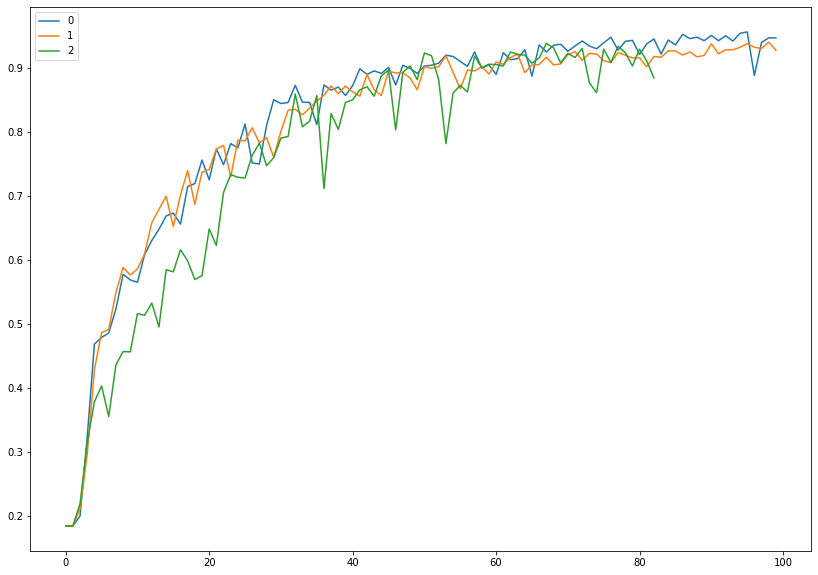

In [55]:
plt.figure(figsize=(14, 10))
for k,i in enumerate(history_list):
    plt.plot(i.history["val_accuracy"], label=k)
    plt.legend()